In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

** Задача 1. **

Решение:

In [2]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом матричного умножения матриц A и B.'''
    return (A[:, np.newaxis] * np.full((len(A), len(B[0]), len(B)), B.T)).sum(axis=2)

Проверка:

In [3]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
print(np.abs(C1 - C2).sum())
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)

CPU times: user 123 ms, sys: 127 ms, total: 250 ms
Wall time: 248 ms
CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 3.85 ms
1.8839614313e-09
CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 2.32 ms
CPU times: user 22.4 s, sys: 387 ms, total: 22.8 s
Wall time: 22.4 s


** Задача 2. **

Решение:

In [4]:
def cumavg(X):
    '''По последовательности чисел (x_1, ..., x_n) строит последовательность средних частичных сумм'''
    return np.array(X).cumsum() / np.arange(1, len(X) + 1)

Проверка:

In [5]:
def stupid_cumavg(X):
    S = [0 for i in range(len(X))]
    for i in range(len(X)):
        S[i] = X[i] + S[i - 1]
    for i in range(len(X)):
        S[i] /= i + 1
    return S

X = sps.uniform.rvs(size=10 ** 7)

%time S1 = cumavg(X)
%time S2 = stupid_cumavg(X)
print(np.abs(S1 - S2).sum())

CPU times: user 123 ms, sys: 56.7 ms, total: 180 ms
Wall time: 178 ms
CPU times: user 9.25 s, sys: 143 ms, total: 9.39 s
Wall time: 9.39 s
0.0


**График:**

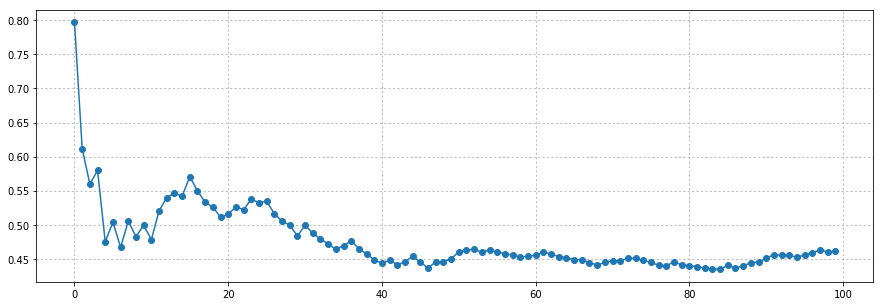

In [6]:
S = cumavg(sps.uniform.rvs(size=100))

plt.figure(figsize=(15, 5))
plt.grid(linestyle='dotted')
plt.plot(range(100), S, marker='o')
plt.show()

** Задача 3. **

In [7]:
def avgmin(A):
    '''Для матрицы A вычисляет средний минимум по столбцам'''
    return np.array(A).min(axis=0).mean()

In [8]:
def stupid_avgmin(A):
    N, M = len(A), len(A[0])
    min_col = [min([A[i][j] for i in range(N)]) for j in range(M)]
    return sum(min_col) / M

N, M = 5000, 10000
A = sps.uniform.rvs(size=(N, M))

%time S1 = avgmin(A)
%time S2 = stupid_avgmin(A)
print(np.abs(S1 - S2))

CPU times: user 183 ms, sys: 160 ms, total: 343 ms
Wall time: 2.07 s
CPU times: user 19.9 s, sys: 26.7 ms, total: 20 s
Wall time: 20 s
4.06575814682e-19


** Задача 4. **

In [9]:
def func4(X, v=0):
    '''Заменяет все чётные числа из массива X на число v, а все нечётные возводит в квадрат и записывает в обратном порядке'''
    # Если X имеет другой тип, нужно выполнить преобразование типов
    X = np.array(X)
    # Получаем массив индексов нечётных элементов
    odd_indexes = (X % 2).nonzero()[0]
    # Получаем массив индексов чётных элементов
    even_indexes = (1 - X % 2).nonzero()[0]
    # Заменяем все чётные числа на число v
    X[even_indexes] = v
    # Получаем развёрнутый массив индексов нечётных элементов
    odd_indexes_reverse = odd_indexes[::-1]
    # Возводит все нечётные числа в квадрат и разворачивает их
    X[odd_indexes] = X[odd_indexes_reverse] ** 2
    return X

In [10]:
def stupid_func4(X, v=0):
    odd = [elem ** 2 for elem in X if elem % 2]
    
    new_X = []
    j = len(odd) - 1
    for i in range(len(X)):
        if X[i] % 2:
            new_X.append(odd[j])
            j -= 1
        else:
            new_X.append(v)
    
    return new_X

X = sps.randint.rvs(size=10 ** 7, low=0, high=100)

%time A1 = func4(X)
%time A2 = stupid_func4(X)
print(np.abs(A1 - A2).sum())

CPU times: user 610 ms, sys: 117 ms, total: 727 ms
Wall time: 728 ms
CPU times: user 9.27 s, sys: 76.7 ms, total: 9.35 s
Wall time: 9.35 s
0
